In [1]:
from tdmclient import ClientAsync
import asyncio
import matplotlib.pyplot as plt
from threading import Timer
import numpy as np

In [11]:
#from the labs :
class RepeatedTimer:
    def __init__(self, interval, function, *args, **kwargs):
        self._timer = None
        self.interval = interval
        self.function = function
        self.args = args
        self.kwargs = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        if self._timer is not None:
            self._timer.cancel()
        self.is_running = False

In [19]:

#from the labs
def motors(left, right):
    return {
            "motor.left.target": [left],
            "motor.right.target": [right],
    }


# Define the main function for data recording
async def record_data(client, node, speed_l,speed_r,interval,data,iterations=200,wait_t=0.01):
    #data = []
    counter = {"iteration": 0}

    # Function to collect data repeatedly
    def collect_data():
        if counter["iteration"] < iterations:
            # Read variables from the robot
            client.aw(node.wait_for_variables())
            data.append({
                "ground_sensor1": node["prox.ground.reflected"][0],
                "ground_sensor2": node["prox.ground.reflected"][1],
                "left_speed": node["motor.left.speed"],
                "right_speed": node["motor.right.speed"]
            })
            counter["iteration"] += 1
        else:
            # Stop motors and timer after the required samples
            rt.stop()
            node.set_variables(motors(0, 0))

    # Set the initial motor speeds
    await node.set_variables(motors(speed_l, speed_r))

    # Start the RepeatedTimer
    rt = RepeatedTimer(interval, collect_data)

    # Wait until data collection is complete
    while counter["iteration"] < iterations:
        print(f"Data collected: {counter['iteration']}/{iterations}")
    
        await client.sleep(wait_t)
        
    node.set_variables(motors(0, 0))

    # Return collected data
    return {'name': node.props["name"], 'target_speed': (speed_l,speed_r), 'data': data}







In [4]:
# Function to move robot in a straight line
async def move_straight(client, node, target_speed, duration, data, interval):
    print("Moving straight...")
    iterations = int(duration / interval)
    return await record_data(client, node, target_speed,target_speed, interval, data, iterations)

# Function to turn the robot by 90 degrees
async def turn_90_degrees(client, node, speed, duration, data, interval):
    print("Turning 90 degrees...")
    iterations = int(duration / interval)
    return await record_data(client, node, speed,-speed, interval, data, iterations)

In [5]:
    # Initialize data storage
data = []
interval = 0.1  # Time interval for recording data
async def main():
    with ClientAsync() as client:
        with await client.wait_for_node() as node:


    # 1. Move straight
            target_speed_straight = 200  # Speed in mm/s
            duration_straight = 5  # Duration in seconds
            data.append(move_straight(client, node, target_speed_straight, duration_straight, data, interval))

    # 2. Perform a 90-degree turn
            turn_speed = 100  # Set lower speed for turning
            turn_duration = 2  # Adjust duration for 90-degree turn
            data.append(turn_90_degrees(client, node, turn_speed, turn_duration, data, interval))

         # 3. Move straight again
            duration_straight_after_turn = 5  # Duration in seconds
            data.append(move_straight(client, node, target_speed_straight, duration_straight_after_turn, data, interval))

            #Stop the robot
            await node.set_variables(motors(0, 0))

    # Save the data
    #np.save("robot_experiment_data.npy", data)
    print("Experiment complete. Data saved.")

IndentationError: expected an indented block (3822758723.py, line 5)

In [3]:
async def check_connection():
    with client:
        with await node:
            print("Connection successful")
            



await check_connection()

Connection successful


In [20]:
thym_data = []
data = []
#wait_t = 0.001
target_speed = 100
iterations = 200
interval = 0.01  # 10ms interval
async def main():
    with ClientAsync() as client:
        with await client.lock() as node:
            data.append(await record_data(client, node, target_speed,target_speed, interval,thym_data,iterations))
            #print(data)
            
            

In [21]:
await main()

Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 0/200
Data collected: 5/200
Data collected: 6/200
Data collected: 10/200
Data collected: 12/200
Data collected: 16/200
Data collected: 20/200
Data collected: 24/200
Data collected: 28/200
Data collected: 29/200
Data collected: 30/200
Data collected: 31/200
Data collected: 32/200
Data collected: 32/200
Data collected: 33/200
Data collected: 35/200
Data collected: 36/200
Data collected: 36/200
Data collected: 38/200
Data collected: 38/200
Data collected: 39/200
Data collected: 41/200
Data collected: 41/200
Data collected: 42/200
Data collec

In [46]:
data

[{'name': 'Thymio 235',
  'target_speed': 30,
  'data': [{'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2': 678,
    'left_speed': 23,
    'right_speed': 23},
   {'ground_sensor1': 506,
    'ground_sensor2

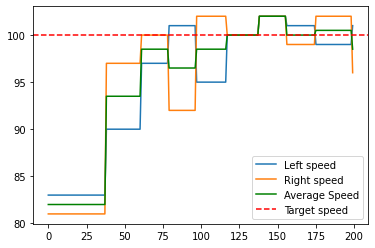

In [24]:
left_speed = np.array([sample["left_speed"] for sample in thym_data]) 
right_speed = np.array([sample["right_speed"] for sample in thym_data])
avg_speed = (left_speed + right_speed) / 2
plt.plot(left_speed)
plt.plot(right_speed)
plt.plot(avg_speed, color='g')
plt.axhline(target_speed, color='r', linestyle='--')
plt.legend(["Left speed", "Right speed","Average Speed", "Target speed"])
plt.show()
#legend the plot




In [25]:
left_speed_variance = np.var(left_speed*0.43)
right_speed_variance = np.var(right_speed*0.43)
left_speed_variance, right_speed_variance

(8.575662000000001, 10.985112390000005)

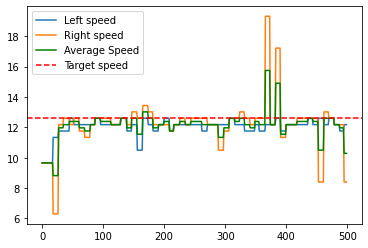

In [ ]:
left_speed = np.array([sample["left_speed"] for sample in thym_data]) * 0.43
right_speed = np.array([sample["right_speed"] for sample in thym_data]) * 0.43
avg_speed = (left_speed + right_speed) / 2
plt.plot(left_speed)
plt.plot(right_speed)
plt.plot(avg_speed, color='g')
plt.axhline(target_speed*0.42, color='r', linestyle='--')
plt.legend(["Left speed", "Right speed","Average Speed", "Target speed"])
plt.show()
#legend the plot




In [78]:
left_speed_variance = np.var(left_speed)
right_speed_variance = np.var(right_speed)
left_speed_variance, right_speed_variance

(0.3358225583999998, 2.69713836)

In [62]:
#mean,std, median of the left and right speed
left_mean = np.mean(left_speed)
right_mean = np.mean(right_speed)
left_std = np.std(left_speed)
right_std = np.std(right_speed)
left_median = np.median(left_speed)
right_median = np.median(right_speed)
speed_to_mms = 0.43  
left_speed_mms_var = np.var(left_speed / speed_to_mms)
right_speed_mms_var = np.var(right_speed / speed_to_mms)
print(f'Left speed variance: {left_speed_mms_var}, Right speed variance: {right_speed_mms_var}')
print(f'Left mean: {left_mean}, Right mean: {right_mean}')
print(f'Left std: {left_std}, Right std: {right_std}')
print(f'Left median: {left_median}, Right median: {right_median}')



Left speed variance: 10.296138453217948, Right speed variance: 82.69280692266089
Left mean: 28.662, Right mean: 29.11
Left std: 1.3797666469370824, Right std: 3.9102301722532906
Left median: 29.0, Right median: 29.0


In [64]:
speed_data = np.vstack((left_speed / speed_to_mms, right_speed/ speed_to_mms))
R = np.cov(speed_data)
print(R)

[[10.316772   10.36784223]
 [10.36784223 82.85852397]]


In [61]:
speed_to_mms = 0.42   
avg_speed = (left_speed+right_speed)/2
std_speed = np.std(avg_speed/speed_to_mms)  # [mm^2/s^2]
var_speed = np.var(avg_speed/speed_to_mms)  # [mm^2/s^2]
cov_speed = np.cov(np.vstack((right_speed, left_speed))/speed_to_mms)
print(f'Average speed: {np.mean(avg_speed/speed_to_mms)} mm/s')
print(f'Std speed: {std_speed} mm^2/s^2')
print(f'Variance speed: {var_speed} mm^2/s^2')
print(f'Covariance speed: {cov_speed} mm^2/s^2')

Average speed: 68.77619047619048 mm/s
Std speed: 5.458046546965639 mm^2/s^2
Variance speed: 29.79027210884354 mm^2/s^2
Covariance speed: [[86.85113992 10.86742646]
 [10.86742646 10.81389536]] mm^2/s^2


In [69]:
# Convert speeds to mm/s

wheel_distance = 90 #mm
left_speeds_mm = left_speed * speed_to_mms
right_speeds_mm = right_speed * speed_to_mms

    # Calculate linear velocities (average of both wheels)
avg_speeds_mm = (left_speeds_mm + right_speeds_mm) / 2

    # Calculate angular velocities (difference of wheels divided by wheel distance)
angular_velocities = (right_speeds_mm - left_speeds_mm) / wheel_distance

    # Estimate variances for the states
var_x = np.var(avg_speeds_mm)  # Variance in x-position
var_y = 0  # Assume negligible noise in y for a differential drive robot
var_theta = np.var(angular_velocities)  # Variance in orientation (theta)
var_wheel_left = np.var(left_speeds_mm)  # Variance in left wheel speed
var_wheel_right = np.var(right_speeds_mm)  # Variance in right wheel speed

    # Construct the Q matrix
Q = np.diag([var_x, var_y, var_theta, var_wheel_left, var_wheel_right])
print(Q)

[[9.71650240e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.05137411e-04 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.52004484e-01
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.82710251e+00]]


In [2]:
import math
speed_to_mms = 0.43

# Function to set motor speeds
def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

# Function to calculate time required for a specified number of turns
def calculate_turn_time(speed, wheel_base, turns=2):
    """
    Calculate the time required for a given number of turns at a specific speed.
    - `speed`: The motor speed in Thymio's units.
    - `wheel_base`: The distance between the wheels in mm.
    - `turns`: Number of full 360° rotations.
    """
    # Angular speed (radians/s) = (2 * speed * speed_to_mms) / wheel_base
    angular_speed = (2 * speed * speed_to_mms) / wheel_base  # rad/s
    time_for_1_turn = (2 * math.pi) / angular_speed  # time for 1 full turn
    return time_for_1_turn * turns  # time for the specified number of turns

# Main function to perform 2 turns
async def perform_two_turns(client, node, speed=50, wheel_base=90):
    """
    Makes the robot perform 2 full turns (720°).
    - `client`: The Thymio client.
    - `node`: The Thymio node.
    - `speed`: The motor speed (default is 100).
    - `wheel_base`: The distance between wheels in mm (default is 90 mm).
    """
    # Calculate time needed for 2 full turns
    turn_time = calculate_turn_time(speed, wheel_base, turns=2)
    
    print(f"Turning time required for 2 full turns: {turn_time:.2f} seconds")

    # Set motor speeds for turning (one wheel forward, other backward)
    await node.set_variables(motors(speed, speed))
    
    #try:
        # Wait for the turning to complete
    await client.sleep(turn_time)
    print("woke up")
    #finally:
        # Stop the robot after completing the turn
    await node.set_variables(motors(0, 0))
    print("Completed 2 full turns!")


In [1]:
from tdmclient import ClientAsync
import asyncio
import matplotlib.pyplot as plt
from threading import Timer
import numpy as np

In [3]:
async def main():
    with ClientAsync() as client:
        with await client.wait_for_node() as node:
            await node.lock()
            print("Performing 2 full turns...")
            
            await perform_two_turns(client, node)
            print("Experiment complete.")

In [4]:
await main()

Performing 2 full turns...
Turning time required for 2 full turns: 26.30 seconds
woke up
Completed 2 full turns!
Experiment complete.
